## Introdução

Para essa etapa do desafio, busquei mostrar como é o meu processo inicial de análise de um dataset, com destaque para a verificiação da qualidade dos dados, a fim de corrigir qualquer eventual erro que pudesse comprometer subsequentes modelos e dashboards. <br>
Assim, após carregar o dataset e ver o cabeçalho e as primeiras linhas para ter uma primeira impressão geral,rodei códigos que me permitssem confirmar a integrigdade dos dados cumprindo o seguinte checklist:<br>
- [x] Separador <br>
- [x] Encoding <br>
- [x] Decimais <br>
- [x] Tipo de dados <br>
- [x] Itens únicos <br>
- [x] Duplicatas <br>
- [x] Dados faltantes <br> <br>
Em seguida, é feita as análises exploratórias propriamente ditas, fazendo proveito de métodos que permitem filtrar e agregar os dados que são exibidos na forma de tabelas e gráficos

In [1]:
#libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
#Apenas ajeitando a formatação dos números para que fiquem mais cognoscíveis
pd.options.display.float_format = '{:.2f}'.format
#pd.reset_option('^display.', silent=True) - caso queira resetar para a formatação padrão

In [3]:
#Carregando o csv no pandas
df = pd.read_csv('desafio_BI.csv', decimal=',', sep='|')

In [4]:
#Eu  gosto desse método para ver a "cara" da tabela
df.head()

,Data,Marca,Fabricante,Referência_Elofar,UF,Unidades,R$,Tipo_canal
0,2018-01-01,ALIVBABY,CAZI,BENZEVIT,BA,31.00,171.89,FARMACIAS
1,2018-01-01,ALIVBABY,CAZI,BENZEVIT,CE,529.00,3160.75,FARMACIAS
2,2018-01-01,ALIVBABY,CAZI,BENZEVIT,DF,7.00,38.81,FARMACIAS
3,2018-01-01,ALIVBABY,CAZI,BENZEVIT,GO,15.00,83.17,FARMACIAS
4,2018-01-01,ALIVBABY,CAZI,BENZEVIT,MA,295.00,1635.69,FARMACIAS


A primeira tentativa de importação deu errado, pois o separador utilizado era o '|'. Usando o método head isso foi facilmente identificado e corrigido

In [5]:
#Também gosto de ter uma noção do tamanho do dataset em n de linhas
len(df)

253270

In [6]:
#Alterando o nome da coluna apenas porque usar o caracter $ fora de uma string estava causando problemas
df.rename(columns={"R$": "Valor"}, inplace = True)

In [7]:
#Verificando se se houve algum erro de digitação na hora de inserir dados, e corrigindo-os caso houvesse
#Então na verdade eu rodei essa célula várias vezes para testar diferentes colunas
set(df.Tipo_canal)

{'FARMACIAS', 'HOSPITALAR', 'OUTROS'}

Ao observar a lista de itens distintos, pode-se confirmar que não há nemhum elemento fruto de um erro de digitação ou coisa do tipo

In [8]:
#Transformando o tipo de dado da coluna data para um objeto de data
df['Data'] = pd.to_datetime(df.Data)

In [9]:
#A idiea aqui é proceder igual a célula 7. Porém dessa vez é para conferir o tipo dos dados
type(df.Data[0])

pandas._libs.tslibs.timestamps.Timestamp

Nessa etapa por exemplo eu identifiquei que Unidades e R$ estavam sendo lidas como strings, então consertei isso na importação do csv, uma vez que o problema estava no caracter utilizado para identificar decimais

In [10]:
#Verificando se há dados faltantes
df[df.isna().any(axis=1)]

,Data,Marca,Fabricante,Referência_Elofar,UF,Unidades,Valor,Tipo_canal


In [11]:
#Verificando se há linhas duplicadas
df[df.duplicated() == True]

,Data,Marca,Fabricante,Referência_Elofar,UF,Unidades,Valor,Tipo_canal


<br> Como as duas verificações anteriores não reotrnaram nenhuma linha, conclui-se que não há linhas repetidas, nem dados faltantes

In [12]:
#Vendo estatísticas descritivas númericas
df.describe(include=[np.number])

,Unidades,Valor
count,253270.00,253270.00
mean,1924.03,15197.10
std,12063.78,62060.93
min,0.00,0.01
25%,12.00,142.84
50%,106.00,1108.41
75%,737.00,7644.73
max,814510.00,3948750.74


Analisando o resumo das principais estatísticas descritivas, identificamos que há vendas de menos de uma unidade. Por se tratar de uma variável discreta, supõe-se que há algum tipo de erro. Portanto, como proceder diante disso é algo que precisaria ser discutido

In [13]:
#Vendo estatísticas descritivas das datas
df['Data'].describe()

count                  253270
unique                     36
top       2020-12-01 00:00:00
freq                     7650
first     2018-01-01 00:00:00
last      2020-12-01 00:00:00
Name: Data, dtype: object

Aqui, é possível concluir que todas as datas estão entre 2018 e 2020. Ou seja, não há nenhum erro do tipo terem inserido valores intrinsicamente equivocados como ano ser 2035. Além do mais, pelo fato de o dataset abringir 3 anos e a coluna Data possuir 36 valores únicos, infere-se que o maior nivel de detalhamento é o mensal, pois  36 (valores únicos)/ 3(anos) = 12 (meses) 

### A partir de agora, dar início às análises descritivas iniciais
Após o processo de validação de dados acima, crio tabelas e gráficos que permitem gerar insights a respeito dos dados

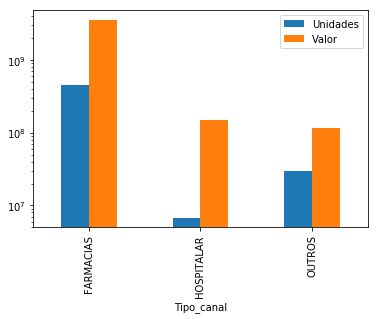

In [14]:
#Verificação dos totais de venda por unidade e valor
df.groupby('Tipo_canal').sum().plot.bar(logy=True);

#Percebemos que as vendas hospitalres possuem um valor maior que "outros" apesar do menor número de únidades vendidas

Como a ideia era mesmo uma análise breve de caráter inicial, os gráficos foram simples e aepnas com o básico mesmo. Por isso fiz o gráfico com um eixo y apenas e em escala logarítimica. Uma opção para facilitar a compreensão seria colocar dois eixos y

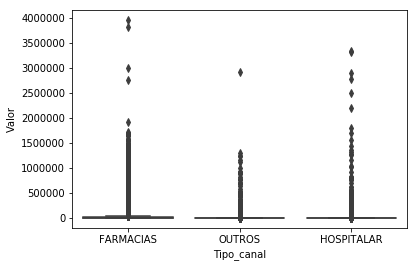

In [15]:
#Verificação distribuição dos dados
sns.boxplot(data=df, x=df.Tipo_canal, y='Valor');

Com esse boxplot percebemos que a grande maioria dos valores estão num range até 50 mil reais.
Dada eesa distribuição dos dados, uma possibilidade agora seria a segmentação entre classes de vendas de maior e menor porte

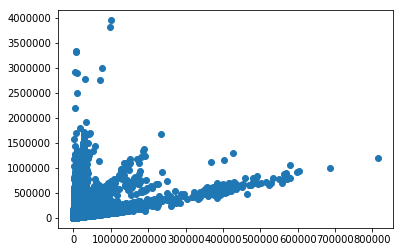

In [16]:
#vendo se há correlação entre unidades vendidas e valor total
plt.scatter(df.Unidades, df.Valor);

De início não parece haver uma correlação única unidades x valor. Mas é possível identificar alguns clusters de correlação principais. A destes poderia ser feita uma investigação mais detalhada

In [17]:
#Criando uma variável que permite analisar especifcamente as vendas feitas no canal farmácia
venda_farmacia = df.query('Tipo_canal == "FARMACIAS"')
venda_farmacia.describe()

,Unidades,Valor
count,159712.00,159712.00
mean,2819.57,22426.17
std,14184.82,72136.45
min,0.02,0.01
25%,61.00,624.66
50%,339.00,3540.32
75%,1523.00,15328.87
max,814510.00,3948750.74


In [18]:
#Tabela geral agrupando por fabricante e marca
marcas_agregadas = df.groupby(['Fabricante', 'Marca']).sum()
marcas_agregadas.head()

Unidades      Valor
Fabricante Marca                                  
ABBOTT     IBEROL                  3.00      26.79
           NIMESULIDA ABT         19.00      88.53
           SINTALGIN              17.00     266.12
           VALMANE                 2.00      97.06
ACHE       CIPROFLOXACINO ACH 153500.00 1892393.38

In [19]:
#Vendo umas estatísticas descritivas básicas
marcas_agregadas.describe()

,Unidades,Valor
count,317.00,317.00
mean,1537219.98,12141860.79
std,5665885.26,25683488.55
min,1.00,2.21
25%,165.00,1745.60
50%,87480.00,1381899.65
75%,868359.00,9737724.16
max,82442078.58,170796783.42


In [20]:
#Para fazer o agrupamento por mês abaixo, antes é necessário transformar a coluna data em índice do df
df.set_index('Data', inplace = True)

#Agregando vendas e Referência Elofar em uma variável para utilizá-la no gráfico abaixo
vendas_agg = df.groupby([pd.Grouper(freq="m"), 'Referência_Elofar']).sum()

#Ao fazer o groupby acima, Data e Referência_Elofar viraram índices. Os índices serão resetados para que essas colunas sejam
#usados para fazer o gráfico
vendas_agg.reset_index(inplace =True)

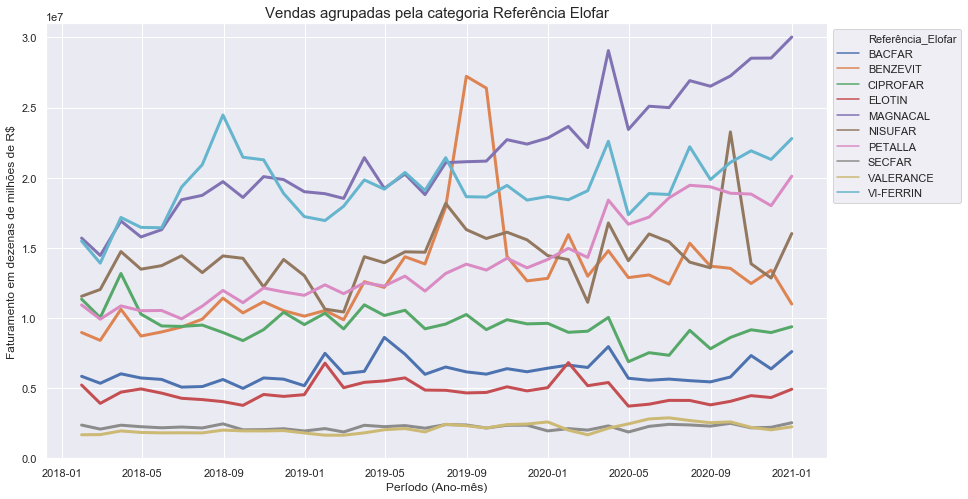

In [21]:

sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(14,8)})

ax = sns.lineplot(data= vendas_agg, x ='Data', y = 'Valor',
                  hue='Referência_Elofar',
                  legend='full', lw=3)

plt.title('Vendas agrupadas pela categoria Referência Elofar', size= 15)
plt.ylim(0, 3.1*1e7)
plt.legend(bbox_to_anchor=(1, 1))
plt.ylabel('Faturamento em dezenas de milhões de R$')
plt.xlabel('Período (Ano-mês)')
plt.show()

#plt.plot(vendas_agg.Valor, label = 'Referência_Elofar')

Apenas pelo gráfico, sem análises mais refinadas, os grupos mais promissores para investimentos são Magnacal e Petallia 